### 第4章: 形態素解析(30~39)

夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

・MeCabは、日本語の形態素解析エンジン。

・mecabをanacondaで使うために、こちらを参考にした。(インストール先とpathを同じにすること)→https://qiita.com/probabilityhill/items/e60831380173f408ac5d

・python 3.11だと使えないので、mecab-envの仮想環境作ってpython=3.8にしてる.

・mecab-envに移動した後、conda install -c mzh mecab-python3した。

### ざっくりとmecabの出力結果の構造について
表層系\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用形,活用型,基本形,読み,発音

表層系:実際に文中に現れる形、基本形:辞書に載っている原型、EOSは文字の終わりを示す。

In [1]:
import MeCab

# MeCabオブジェクトの生成
mecab = MeCab.Tagger()

result=mecab.parse("私は図書館でメカブを食べた。")
print(result)

私	名詞,代名詞,一般,*,*,*,私,ワタシ,ワタシ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
図書館	名詞,一般,*,*,*,*,図書館,トショカン,トショカン
で	助詞,格助詞,一般,*,*,*,で,デ,デ
メカブ	名詞,一般,*,*,*,*,*
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
食べ	動詞,自立,*,*,一段,連用形,食べる,タベ,タベ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
。	記号,句点,*,*,*,*,。,。,。
EOS



In [2]:
mecab=MeCab.Tagger()
with open("./files/neko.txt","r") as f_txt, open("./files/neko.txt.mecab","w") as f_mecab:
    lines=f_txt.readlines() #ファイルを行ごとにリストとして読み込む
    for line in lines:
        result=mecab.parse(line)
        f_mecab.write(result)

### 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ

In [3]:
#一文の形態素を格納するリスト
morpheme_sentence=[]

with open("./files/neko.txt.mecab","r") as f:
    for line in f:
        line = line.strip('\n') #各行の改行を削除#これ入れないとnot enough values to unpack (expected 2, got 1)となる
        #表層系とそれ以外に分割
        if line != 'EOS':
            surface,feature=line.split('\t')
            features=feature.split(",")
            morph={
                "surface": surface,
                "base": features[6],
                "pos": features[0],
                "pos1": features[1]
            }
            morpheme_sentence.append(morph)

In [4]:
morpheme_sentence[20:50]

[{'surface': '見当', 'base': '見当', 'pos': '名詞', 'pos1': 'サ変接続'},
 {'surface': 'が', 'base': 'が', 'pos': '助詞', 'pos1': '格助詞'},
 {'surface': 'つか', 'base': 'つく', 'pos': '動詞', 'pos1': '自立'},
 {'surface': 'ぬ', 'base': 'ぬ', 'pos': '助動詞', 'pos1': '*'},
 {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'},
 {'surface': '何', 'base': '何', 'pos': '名詞', 'pos1': '代名詞'},
 {'surface': 'でも', 'base': 'でも', 'pos': '助詞', 'pos1': '副助詞'},
 {'surface': '薄暗い', 'base': '薄暗い', 'pos': '形容詞', 'pos1': '自立'},
 {'surface': 'じめじめ', 'base': 'じめじめ', 'pos': '副詞', 'pos1': '一般'},
 {'surface': 'し', 'base': 'する', 'pos': '動詞', 'pos1': '自立'},
 {'surface': 'た', 'base': 'た', 'pos': '助動詞', 'pos1': '*'},
 {'surface': '所', 'base': '所', 'pos': '名詞', 'pos1': '非自立'},
 {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'},
 {'surface': 'ニャーニャー', 'base': '*', 'pos': '名詞', 'pos1': '一般'},
 {'surface': '泣い', 'base': '泣く', 'pos': '動詞', 'pos1': '自立'},
 {'surface': 'て', 'base': 'て', 'pos': '助詞', 'pos1': '接続助詞'},
 {'surface': 'いた事', 'b

### 31.動詞
動詞の表層形をすべて抽出せよ．

In [5]:
verb=[]
for element in morpheme_sentence:
    if element['pos']=='動詞':
        verb.append(element['surface'])
verb_set=set(verb)
verb_set

{'返さ',
 '舞い込む',
 '恐る',
 '違い',
 '向ける',
 '見廻っ',
 '張れる',
 'れろ',
 '湧い',
 '知ら',
 '誘っ',
 '引き受ける',
 '傭っ',
 '明け',
 'しかっ',
 'かかっ',
 'かむ',
 '言わ',
 '冷やかす',
 '吃',
 '尖',
 '引きつけ',
 '沸き上がっ',
 'あけ',
 '印せ',
 '引き込ん',
 '曲がっ',
 'すり',
 '立ち至り',
 'なっ',
 'あく',
 '離す',
 '透き',
 '通っ',
 '生かし',
 '払え',
 'おき',
 'あらわす',
 '掘り出す',
 '略し',
 '思い出し',
 '持ち',
 '追い廻し',
 '散らし',
 '話し',
 '命じ',
 '可愛がら',
 '叩か',
 '絞める',
 '救っ',
 '持ち上がる',
 'おこす',
 'かえ',
 'かため',
 '障ら',
 'もとめ',
 '乗り出す',
 '傾ける',
 '合わし',
 '押し込む',
 '片付い',
 '担ぎ',
 'ふ',
 'むく',
 '通り抜ける',
 '捕まっ',
 'まくっ',
 '通り抜け',
 '落ちつか',
 '留っ',
 '被る',
 '当り',
 '詠ん',
 '立ち返っ',
 '堪え',
 '印し',
 '浮い',
 '捲か',
 '加える',
 'つかまっ',
 '弄する',
 '投げ出さ',
 'とめ',
 '見積っ',
 'ござる',
 'くばり',
 '繰返し',
 '跳ね',
 '余っ',
 '食お',
 '吸取り',
 '極め',
 '生ずる',
 'ぼ',
 '間違え',
 '引き裂い',
 '威張る',
 'くぐっ',
 '絶つ',
 '翻せ',
 '注する',
 '満ち',
 'づい',
 'こす',
 '立ち寄っ',
 '狂っ',
 'かぎっ',
 '思っ',
 '較べ',
 'なりゃ',
 '現われ',
 '浮ば',
 'あれ',
 '考え',
 '巻き付け',
 '習お',
 '進ん',
 'あいかわら',
 'めで',
 '罷り',
 '寝込ま',
 'しだす',
 '還せ',
 '給う',
 '飲み下し',
 '飛び離れ',
 'あたわ',
 '蒔い',
 'たまっ',
 '聞き分け

### 32. 動詞の基本形
動詞の基本形をすべて抽出せよ．

In [6]:
verb_basic=[]
for element in morpheme_sentence:
    if element['pos']=='動詞':
        verb_basic.append(element['base'])
verb_basic

['生れる',
 'つく',
 'する',
 '泣く',
 'する',
 'いる',
 '始める',
 '見る',
 '聞く',
 '捕える',
 '煮る',
 '食う',
 '思う',
 '載せる',
 'られる',
 '持ち上げる',
 'られる',
 'する',
 'ある',
 '落ちつく',
 '見る',
 '見る',
 '思う',
 '残る',
 'いる',
 'する',
 'れる',
 'する',
 '逢う',
 '出会う',
 'する',
 'のむ',
 'なる',
 'する',
 'いる',
 '吹く',
 'する',
 '弱る',
 '飲む',
 '知る',
 '坐る',
 'おる',
 'する',
 'する',
 '始める',
 '動く',
 '動く',
 '分る',
 '廻る',
 'なる',
 '助かる',
 '思う',
 'いる',
 'さる',
 'する',
 '出る',
 'する',
 'いる',
 '考え出す',
 '分る',
 '付く',
 '見る',
 'いる',
 'おる',
 '見える',
 '隠す',
 'しまう',
 '違う',
 '明く',
 'いる',
 'られる',
 '這い出す',
 '見る',
 '棄てる',
 'られる',
 '這い出す',
 'ある',
 '坐る',
 'する',
 '考える',
 '見る',
 '出る',
 'する',
 '泣く',
 '来る',
 'くれる',
 '考え付く',
 'やる',
 '見る',
 '来る',
 '渡る',
 'かかる',
 '減る',
 '来る',
 '泣く',
 '出る',
 'ある',
 'ある',
 'する',
 'そる',
 '廻る',
 '始める',
 'する',
 '這う',
 '行く',
 '出る',
 '這入る',
 'なる',
 '思う',
 '崩れる',
 'もぐり込む',
 '破れる',
 'いる',
 'する',
 '知れる',
 '云う',
 '至る',
 'する',
 'なる',
 'いる',
 '忍び込む',
 '分る',
 'なる',
 '減る',
 '降る',
 '来る',
 '出来る',
 'なる',
 'あるく',
 '行く',
 '考える',
 '這入る',
 'おる',
 '見る',
 'する',
 '逢う',
 '見る

### 33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ

In [7]:
noun_phrase=[]
#for element in morpheme_sentence:とするとindexの取得が面倒
for element_index in range(len(morpheme_sentence)):
    if morpheme_sentence[element_index]['surface']=='の' and morpheme_sentence[element_index-1]['pos']=='名詞' and morpheme_sentence[element_index+1]['pos']=='名詞':
        noun_phrase.append(morpheme_sentence[element_index-1]['surface']+morpheme_sentence[element_index]['surface']+morpheme_sentence[element_index+1]['surface'])
noun_phrase
    

['彼の掌',
 '掌の上',
 '書生の顔',
 'はずの顔',
 '顔の真中',
 '穴の中',
 '書生の掌',
 '掌の裏',
 '何の事',
 '肝心の母親',
 '藁の上',
 '笹原の中',
 '池の前',
 '池の上',
 '一樹の蔭',
 '垣根の穴',
 '隣家の三',
 '時の通路',
 '一刻の猶予',
 '家の内',
 '彼の書生',
 '以外の人間',
 '前の書生',
 'おさんの隙',
 'おさんの三',
 '胸の痞',
 '家の主人',
 '主人の方',
 '鼻の下',
 '吾輩の顔',
 '自分の住',
 '吾輩の主人',
 '家のもの',
 'うちのもの',
 '彼の書斎',
 '本の上',
 '皮膚の色',
 '本の上',
 '彼の毎夜',
 '以外のもの',
 '主人の傍',
 '彼の膝',
 '膝の上',
 '経験の上',
 '飯櫃の上',
 '炬燵の上',
 'ここのうち',
 '供の寝床',
 '彼等の中間',
 '供の一',
 '例の神経',
 '性の主人',
 '次の部屋',
 '自分の勝手',
 '吾輩の方',
 '台所の板の間',
 '吾輩の尊敬',
 '向の白',
 '玉のよう',
 'そこの家',
 '家の書生',
 '裏の池',
 '親子の愛',
 'もっともの議論',
 '刺の頭',
 '鰡の臍',
 '彼等のため',
 '軍人の家',
 '代言の主人',
 '教師の家',
 '猫の時節',
 '吾輩の家',
 '家の主人',
 'だらけの英文',
 '胃弱の癖',
 '後架の中',
 '平の宗',
 '月の月給',
 '当分の間',
 '下のよう',
 '今更のよう',
 '主人の述懐',
 '彼の友',
 '金縁の眼鏡',
 '主人の顔',
 '内の想像',
 '訳のもの',
 '利の大家',
 '金縁の裏',
 '吾輩の後ろ',
 '彼の友',
 '吾輩の輪廓',
 '顔のあたり',
 '上乗の出来',
 '顔の造作',
 '他の猫',
 '不器量の吾輩',
 '吾輩の主人',
 '斯産の猫',
 '斑入りの皮膚',
 '主人の彩色',
 '一種の色',
 '身内の筋肉',
 '主人の予定',
 '座敷の中',
 '悪口の言いよう',
 '人の気',
 '彼の背中',
 'こっちの便利',
 '自

### 34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ

↓形態素解析一文分をリストの一要素として考えないと、34解けない

In [8]:
#一文の形態素を格納するリスト
morpheme_one_sentence=[]
morpheme_sentence=[]

with open("./files/neko.txt.mecab","r") as f:
    for line in f:
        line = line.strip('\n') #各行の改行を削除#これ入れないとnot enough values to unpack (expected 2, got 1)となる
        #表層系とそれ以外に分割
        if line != 'EOS':
            surface,feature=line.split('\t')
            features=feature.split(",")
            morph={
                "surface": surface,
                "base": features[6],
                "pos": features[0],
                "pos1": features[1]
            }
            morpheme_one_sentence.append(morph) 
            if morph['surface']=='。': #一文の最後の処理
                morpheme_sentence.append(morpheme_one_sentence) #形態素解析一文分を一つのリストとしてappend
                morpheme_one_sentence=[]

In [9]:
noun_list = []
for sentense in morpheme_sentence:#形態素の一文分取り出す
    count = 0
    sent = ""
    for i in range(len(sentense)): #一文の中で形態素ごとにfor文まわす
        if sentense[i]["pos"] == "名詞":
            count += 1
            sent += sentense[i]["surface"]
        else:
            if count >= 2:
              noun_list.append(sent)
            count = 0
            sent = ""
noun_set = set(noun_list)
len(noun_set)



4457

### 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ

In [10]:
morpheme_sentence[:2]

[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'},
  {'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
  {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'},
  {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]]

In [11]:
import collections
words=[]
exception=['記号','助詞','助動詞']
for sentence in morpheme_sentence:#形態素の一文分取り出す。
    for i in range(len(sentence)):
        if not sentence[i]['pos'] in exception:
            # ('の', 9194)で最も多い
            words.append(sentence[i]['surface'])
c=collections.Counter(words)
c_most=c.most_common()
c_most[:10]

[('し', 2259),
 ('の', 1611),
 ('いる', 1249),
 ('事', 1207),
 ('する', 992),
 ('もの', 981),
 ('君', 973),
 ('云う', 937),
 ('主人', 932),
 ('ない', 765)]

In [12]:
print(c_most[0]) #('し', 2259)
print(c_most[0][0]) #し
print(c_most[0][1]) #2259

('し', 2259)
し
2259


### 36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

- 準備(matplotlibの日本語対応)
https://ai-inter1.com/matplotlib-japanize/

<BarContainer object of 10 artists>

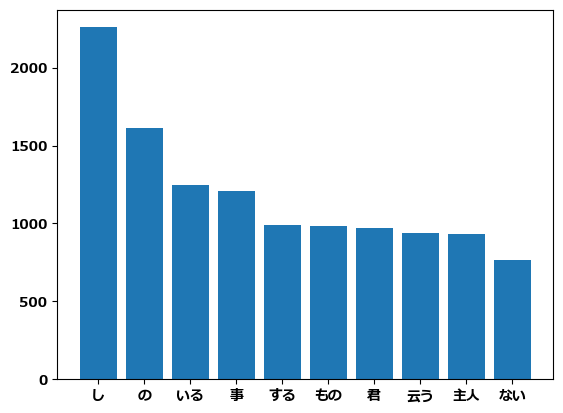

In [13]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname=r'C:\WINDOWS\Fonts\meiryob.ttc', size=10)
 
# データ準備
word_list=[]
frequency_list=[]
ranking10=c_most[:10]
for i in range(10):
    word_list.append(ranking10[i][0])
    frequency_list.append(ranking10[i][1])

plt.xticks(fontproperties=fp)
plt.yticks(fontproperties=fp)
plt.bar(x=word_list,height=frequency_list)
# フォントの設定を適用してラベルを描画


### 37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

<BarContainer object of 10 artists>

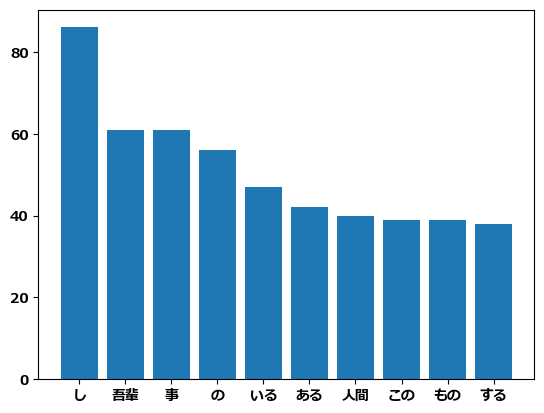

In [14]:
import itertools
import collections
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname=r'C:\WINDOWS\Fonts\meiryob.ttc', size=10)

neko_list=[]
exception=['記号','助詞','助動詞']
for sentence in morpheme_sentence:
    neko_sentence=[] #猫がでてきたら、その文の形態素要素を格納するリスト
    flag=0
    for element in sentence: #1センテンス分の形態素の要素で回す
        if "猫"==element['surface']:
            flag=1
            continue
        if not element['pos'] in exception:
            neko_sentence.append(element['surface'])
    #一文のfor文が終了後、flagがたっていた際のしょり
    if flag==1:
        neko_list.append(neko_sentence) #猫が出てきた文を一要素として、リストに格納
#多重リストを一次元に平坦化
all_word_with_neko=list(itertools.chain.from_iterable(neko_list)) #イテレータを返すので、リストに変換したい場合は上のサンプルコードのようにlist()
c=collections.Counter(all_word_with_neko)
c_most=c.most_common()
word_list=[]
frequency_list=[]
ranking10=c_most[:10]
for i in range(10):
    word_list.append(ranking10[i][0])
    frequency_list.append(ranking10[i][1])
plt.xticks(fontproperties=fp)
plt.yticks(fontproperties=fp)
plt.bar(x=word_list,height=frequency_list)
# フォントの設定を適用してラベルを描画

### 38. ヒストグラム
単語の出現頻度のヒストグラムを描け。ただし、横軸は出現頻度を表し、1から単語の出現頻度の最大値までの線形目盛とする。
縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である。

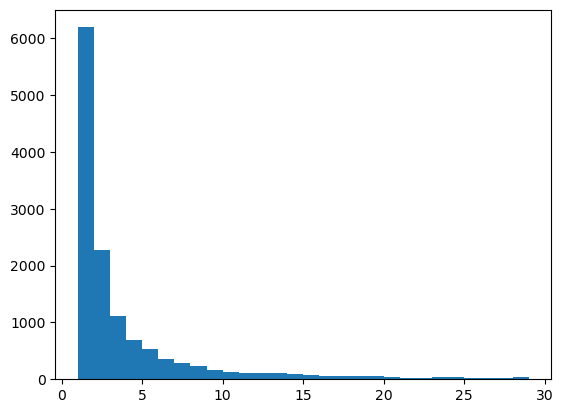

In [15]:
import matplotlib.pyplot as plt
word_list=[]
for sentence in morpheme_sentence:
    for element in sentence:
        word_list.append(element['surface'])
frequency=collections.Counter(word_list)
plt.hist(frequency.values(),range(1,30)) #この方法知らなかった
plt.show()

### 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

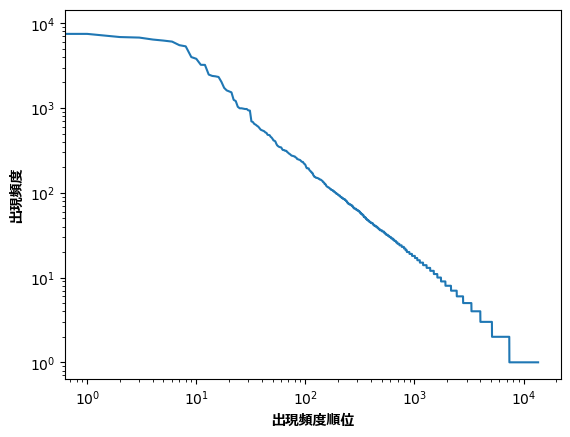

In [41]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname=r'C:\WINDOWS\Fonts\meiryob.ttc', size=10)
word_list=[]
for sentence in morpheme_sentence:
    for element in sentence:
        word_list.append(element['surface'])
frequency=collections.Counter(word_list)
frequency_descending_order=sorted((frequency.values()),reverse=True) 
frequency_descending_order
plt.plot(frequency_descending_order)
plt.xlabel('出現頻度順位',fontproperties=fp)
plt.ylabel('出現頻度',fontproperties=fp)
ax = plt.gca()
# 直前に操作したaxesは、現在の軸(current axes)となる。
# 現在のaxesはgca(get current axes?)で取得できる。
ax.set_yscale('log')  # メイン: y軸をlogスケールで描く
ax.set_xscale('log')

plt.show()


### ジップの法則
文章中で使われる単語の出現頻度を集計して頻度順に並べたとき、単語の出現頻度がn番目に大きい要素は、一位の頻度の1/nに比例する
人口でも成立するらしい→n番目に大きな都市の人口は、最大都市の人口の1/nに比例する
https://bellcurve.jp/statistics/blog/14184.html?srsltid=AfmBOooihl9aS8dtmcn2QRd7-yLmwq0bTG1XKeE_CEtoCt8E0habypI3
https://kotobank.jp/word/%E3%82%B8%E3%83%83%E3%83%97%E3%81%AE%E6%B3%95%E5%89%87-789016